In [123]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [124]:
type(data)

dict

In [125]:
import pandas as pd
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [126]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19539468.00000,19539468.00000,False,NaN,1,NaN,NaN,None,2023-11-11T14:47:00.000Z,37256.08628,17331511541.54868,-45.25040,0.27413,0.34114,7.11555,39.58205,42.89522,26.88618,727964105717.85596,51.17910,782377811927.89001,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851
1,1027,Ethereum,ETH,ethereum,7753,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120261788.11754,120261788.11754,True,NaN,2,NaN,NaN,None,2023-11-11T14:47:00.000Z,2080.79491,10747020708.69114,-59.87210,0.92732,0.05841,13.37700,34.85948,29.87682,12.52388,250240116991.55136,17.59360,250240116991.54999,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851
2,825,Tether USDt,USDT,tether,65544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86673940912.87378,90623656723.31395,True,NaN,3,NaN,NaN,None,2023-11-11T14:46:00.000Z,1.00055,42941368009.38062,-39.23840,-0.00186,-0.00098,-0.01427,0.08010,0.09352,0.11652,86721556813.31148,6.09510,90673442471.72000,None,2023-11-11T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-11 15:48:02.149851
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701871.62485,151701871.62485,False,NaN,4,NaN,NaN,None,2023-11-11T14:46:00.000Z,251.89478,779415050.89521,-32.61330,0.58254,0.60769,6.95015,22.63216,19.01407,4.71686,38212909143.54947,2.68570,38212909143.55000,None,2023-11-11T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-11T14:47:00.000Z,0.67349,1936156689.22767,-33.98680,-0.35420,4.08390,9.92073,40.65756,40.73950,7.07928,36134487228.18707,2.54050,67348787006.03000,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851
5,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,421043309.10922,562117706.15656,True,NaN,6,NaN,NaN,None,2023-11-11T14:47:00.000Z,62.87643,4266777308.06112,28.23320,6.56419,26.05623,50.21766,195.02732,247.66103,155.35468,26473700018.70592,1.86110,35343954424.73000,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851
6,3408,USDC,USDC,usd-coin,14883,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24160842863.27728,24160842863.27728,False,NaN,7,NaN,NaN,None,2023-11-11T14:46:00.000Z,0.99994,4563024454.27644,-39.81180,-0.00059,-0.03856,-0.02763,-0.01670,-0.01208,-0.00694,24159287035.86282,1.69800,24159287035.86000,None,2023-11-11T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-11 15:48:02.149851
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35268562926.72000,36335222697.08800,False,NaN,8,NaN,NaN,None,2023-11-11T14:46:00.000Z,0.38606,492037884.07975,-32.54540,1.62599,5.35412,19.27955,57.93647,55.20872,32.36756,13615840725.94236,0.95700,17372775690.93000,None,2023-11-11T14:46:00.000Z

In [133]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.Timestamp('now')
    #df

    #if not os.path.isfile(r'C:\Users\HP\Documents\API.csv'):
        #df.to_csv(r'C:\Users\HP\Documents\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\HP\Documents\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\HP\Documents\API.csv')


In [136]:
# Use this if you just want to keep it in a dataframe
df2 = pd.json_normalize(data['data'])
df2['Timestamp'] = pd.Timestamp('now')
df_append = pd.DataFrame(df2)
df = pd.concat([df,df_append])

In [140]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [131]:
df72 = pd.read_csv(r'C:\Users\HP\Documents\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19539387.00000,19539387.00000,False,NaN,1,NaN,NaN,NaN,2023-11-11T13:22:00.000Z,37104.69520,18055117362.23133,-46.84400,0.11246,-0.10379,6.83587,38.46410,42.35049,26.32757,725002999022.48523,51.27960,779198599192.08997,NaN,2023-11-11T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:22:58.109982
1,1,1027,Ethereum,ETH,ethereum,7753,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120261788.11754,120261788.11754,True,NaN,2,NaN,NaN,NaN,2023-11-11T13:22:00.000Z,2058.23897,11165261069.81756,-58.80560,-0.17293,-1.15237,12.00691,32.88416,28.79086,11.25875,247527499100.45972,17.49970,247527499100.45999,NaN,2023-11-11T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:22:58.109982
2,2,825,Tether USDt,USDT,tether,65543,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,86673940912.87378,90623656723.31396,True,NaN,3,NaN,NaN,NaN,2023-11-11T13:21:00.000Z,1.00058,43598655560.65425,-40.05680,0.01464,0.04040,-0.01812,0.07472,0.08594,0.11028,86723880526.31129,6.13260,90675872075.89999,NaN,2023-11-11T13:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-11 13:22:58.109982
3,3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151701887.61868,151701887.61868,False,NaN,4,NaN,NaN,NaN,2023-11-11T13:21:00.000Z,250.08037,779430413.46921,-34.10260,0.29638,-0.80164,6.28488,21.38680,18.28597,4.01608,37937664902.64726,2.68270,37937664902.65000,NaN,2023-11-11T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:22:58.109982
4,4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,NaN,2023-11-11T13:22:00.000Z,0.67272,1981517401.90898,-33.42810,0.21431,2.52060,9.38862,40.28259,40.90658,7.22031,36093308737.13847,2.55170,67272037019.09000,NaN,2023-11-11T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:22:58.109982
5,5,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,421043388.84359,562117786.11035,True,NaN,6,NaN,NaN,NaN,2023-11-11T13:22:00.000Z,57.84954,3575226476.10621,7.94660,3.71744,14.03872,37.46201,170.37230,221.21928,134.43223,24357164302.52957,1.72280,32518252599.26000,NaN,2023-11-11T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:22:58.109982
6,6,3408,USDC,USDC,usd-coin,14882,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24158484004.70504,24158484004.70504,False,NaN,7,NaN,NaN,NaN,2023-11-11T13:22:00.000Z,0.99995,4820974025.62030,-37.50830,0.00818,-0.00698,-0.02057,-0.01301,-0.00794,-0.00928,24157334663.83213,1.70830,24157334663.83000,NaN,2023-11-11T13:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-11 13:22:58.109982
7,7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35268564466.02400,36335222697.08800,False,NaN,8,NaN,NaN,NaN,2023-11-11T13:21:00.000Z,0.37921,498510597.71705,-33.08330,0.01496,1.11266,16.52965,54.18884,52.63388,30.30057,13374205183.84686,0.94570,17064466399.05000,NaN,2023-11-11T13:

In [141]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19539468.00000,19539468.00000,False,NaN,1,NaN,NaN,None,2023-11-11T14:47:00.000Z,37256.08628,17331511541.54868,-45.25040,0.27413,0.34114,7.11555,39.58205,42.89522,26.88618,727964105717.85596,51.17910,782377811927.89001,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851,NaT
1,1027,Ethereum,ETH,ethereum,7753,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120261788.11754,120261788.11754,True,NaN,2,NaN,NaN,None,2023-11-11T14:47:00.000Z,2080.79491,10747020708.69114,-59.87210,0.92732,0.05841,13.37700,34.85948,29.87682,12.52388,250240116991.55136,17.59360,250240116991.54999,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851,NaT
2,825,Tether USDt,USDT,tether,65544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86673940912.87378,90623656723.31395,True,NaN,3,NaN,NaN,None,2023-11-11T14:46:00.000Z,1.00055,42941368009.38062,-39.23840,-0.00186,-0.00098,-0.01427,0.08010,0.09352,0.11652,86721556813.31148,6.09510,90673442471.72000,None,2023-11-11T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-11 15:48:02.149851,NaT
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701871.62485,151701871.62485,False,NaN,4,NaN,NaN,None,2023-11-11T14:46:00.000Z,251.89478,779415050.89521,-32.61330,0.58254,0.60769,6.95015,22.63216,19.01407,4.71686,38212909143.54947,2.68570,38212909143.55000,None,2023-11-11T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851,NaT
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-11T14:47:00.000Z,0.67349,1936156689.22767,-33.98680,-0.35420,4.08390,9.92073,40.65756,40.73950,7.07928,36134487228.18707,2.54050,67348787006.03000,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851,NaT
5,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,421043309.10922,562117706.15656,True,NaN,6,NaN,NaN,None,2023-11-11T14:47:00.000Z,62.87643,4266777308.06112,28.23320,6.56419,26.05623,50.21766,195.02732,247.66103,155.35468,26473700018.70592,1.86110,35343954424.73000,None,2023-11-11T14:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 15:48:02.149851,NaT
6,3408,USDC,USDC,usd-coin,14883,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24160842863.27728,24160842863.27728,False,NaN,7,NaN,NaN,None,2023-11-11T14:46:00.000Z,0.99994,4563024454.27644,-39.81180,-0.00059,-0.03856,-0.02763,-0.01670,-0.01208,-0.00694,24159287035.86282,1.69800,24159287035.86000,None,2023-11-11T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-11 15:48:02.149851,NaT
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35268562926.72000,36335222697.08800,False,NaN,8,NaN,NaN,None,2023-11-11T14:46:00.000Z,0.38606,492037884.07975,-32.54540,1.62599,5.35412,19.27955,57.93647,55.20872,32.36756,13615840725.94236,0.95700,173727756

In [100]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [71]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19539387.00000,19539387.00000,False,NaN,1,NaN,NaN,None,2023-11-11T13:26:00.000Z,37085.07949,18035899813.62389,-46.90470,0.00911,-0.07662,6.73071,38.44942,42.32476,26.26950,724619720020.29712,51.23630,778786669224.90002,None,2023-11-11T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:26:46.747609,NaT
1,1027,Ethereum,ETH,ethereum,7753,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120261788.11754,120261788.11754,True,NaN,2,NaN,NaN,None,2023-11-11T13:26:00.000Z,2055.91581,11149776765.10480,-58.88000,-0.35444,-1.21743,11.80074,32.76610,28.65101,11.12714,247248111738.98694,17.49030,247248111738.98999,None,2023-11-11T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:26:46.747609,NaT
2,825,Tether USDt,USDT,tether,65543,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86673940912.87378,90623656723.31395,True,NaN,3,NaN,NaN,None,2023-11-11T13:25:00.000Z,1.00060,43573869413.30655,-40.10700,0.02098,0.04019,-0.01112,0.07035,0.07417,0.10586,86725639161.28241,6.13410,90677710851.55000,None,2023-11-11T13:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-11 13:26:46.747609,NaT
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701887.61868,151701887.61868,False,NaN,4,NaN,NaN,None,2023-11-11T13:25:00.000Z,249.87472,779899436.59894,-34.00170,0.13527,-0.79095,6.30226,21.42665,18.26491,3.90880,37906467226.61947,2.68050,37906467226.62000,None,2023-11-11T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:26:46.747609,NaT
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-11T13:26:00.000Z,0.67179,1981039776.22800,-33.42630,0.04122,2.50537,9.24768,40.06627,40.78127,7.04125,36043600636.20473,2.54970,67179389231.36000,None,2023-11-11T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:26:46.747609,NaT
5,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,421043388.84359,562117786.11035,True,NaN,6,NaN,NaN,None,2023-11-11T13:26:00.000Z,58.66051,3622799483.96093,9.02980,4.89811,15.06630,39.64151,174.29440,226.23665,137.62493,24698619807.12181,1.74680,32974115860.34000,None,2023-11-11T13:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-11 13:26:46.747609,NaT
6,3408,USDC,USDC,usd-coin,14882,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24158484004.70504,24158484004.70504,False,NaN,7,NaN,NaN,None,2023-11-11T13:25:00.000Z,1.00000,4815843244.79286,-37.61940,0.02042,-0.00349,-0.02169,-0.01219,-0.00082,-0.01455,24158476686.57673,1.70870,24158476686.58000,None,2023-11-11T13:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-11 13:26:46.747609,NaT
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35268564466.02400,36335222697.08800,False,NaN,8,NaN,NaN,None,2023-11-11T13:25:00.000Z,0.37859,497134006.72243,-33.32430,-0.17730,1.31076,16.39290,54.07379,52.51186,30.13411,13352342969.81539,0.94440,170365718

In [142]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.29682,0.37431,7.12577,39.60783,42.94945,26.90043
Ethereum,1.04064,0.19254,13.48460,34.99108,30.09071,12.63770
Tether USDt,0.00114,0.00445,-0.01037,0.08539,0.09884,0.12237
BNB,0.59548,0.62413,6.94622,22.62466,19.03847,4.72096
XRP,-0.26393,4.15861,9.96293,40.70123,40.85414,7.10832
Solana,6.52835,25.90549,50.03059,194.29936,247.17539,154.87106
USDC,0.00085,-0.03275,-0.02789,-0.01434,-0.01332,-0.00451
Cardano,1.61703,5.38652,19.32221,57.97511,55.29169,32.39231
Dogecoin,1.03103,10.06907,18.26388,39.90726,31.67830,6.38012


In [143]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.29682
                 quote.USD.percent_change_24h     0.37431
                 quote.USD.percent_change_7d      7.12577
                 quote.USD.percent_change_30d    39.60783
                 quote.USD.percent_change_60d    42.94945
                 quote.USD.percent_change_90d    26.90043
Ethereum         quote.USD.percent_change_1h      1.04064
                 quote.USD.percent_change_24h     0.19254
                 quote.USD.percent_change_7d     13.48460
                 quote.USD.percent_change_30d    34.99108
                 quote.USD.percent_change_60d    30.09071
                 quote.USD.percent_change_90d    12.63770
Tether USDt      quote.USD.percent_change_1h      0.00114
                 quote.USD.percent_change_24h     0.00445
                 quote.USD.percent_change_7d     -0.01037
                 quote.USD.percent_change_30d     0.08539
                 quote.USD

In [144]:
type(df4)

pandas.core.series.Series

In [145]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.29682
                quote.USD.percent_change_24h   0.37431
                quote.USD.percent_change_7d    7.12577
                quote.USD.percent_change_30d  39.60783
                quote.USD.percent_change_60d  42.94945
                quote.USD.percent_change_90d  26.90043
Ethereum        quote.USD.percent_change_1h    1.04064
                quote.USD.percent_change_24h   0.19254
                quote.USD.percent_change_7d   13.48460
                quote.USD.percent_change_30d  34.99108
                quote.USD.percent_change_60d  30.09071
                quote.USD.percent_change_90d  12.63770
Tether USDt     quote.USD.percent_change_1h    0.00114
                quote.USD.percent_change_24h   0.00445
                quote.USD.percent_change_7d   -0.01037
                quote.USD.percent_change_30d   0.08539
                quote.USD.percent_change_60d   0.09884
                quote.USD.percent_change_90d   0.12237
BNB             quote.USD.percent_change_1h    0.59548
                quote.USD.percent_change_24h   0.62413
                quote.USD.percent_change_7d    6.94622
                quote.USD.percent_change_30d  22.62466
                quote.USD.percent_change_60d  19.03847
                quote.USD.percent_change_90d   4.72096
XRP             quote.USD.percent_change_1h   -0.26393
                quote.USD.percent_change_24h   4.15861
                quote.USD.percent_change_7d    9.96293
                quote.USD.percent_change_30d  40.70123
                quote.USD.percent_change_60d  40.85414
                quote.USD.percent_change_90d   7.10832
Solana          quote.USD.percent_change_1h    6.52835
                quote.USD.percent_change_24h  25.90549
                quote.USD.percent_change_7d   50.03059
                quote.USD.percent_change_30d 194.29936
                quote.USD.percent_change_60d 247.17539
                quote.USD.percent_change_90d 154.87106
USDC            quote.USD.percent_change_1h    0.00085
                quote.USD.percent_change_24h  -0.03275
                quote.USD.percent_change_7d   -0.02789
                quote.USD.percent_change_30d  -0.01434
                quote.USD.percent_change_60d  -0.01332
                quote.USD.percent_change_90d  -0.00451
Cardano         quote.USD.percent_change_1h    1.61703
                quote.USD.percent_change_24h   5.38652
                quote.USD.percent_change_7d   19.32221
                quote.USD.percent_change_30d  57.97511
                quote.USD.percent_change_60d  55.29169
                quote.USD.percent_change_90d  32.39231
Dogecoin        quote.USD.percent_change_1h    1.03103
                quote.USD.percent_change_24h  10.06907
                quote.USD.percent_change_7d   18.26388
                quote.USD.percent_change_30d  39.90726
                quote.USD.percent_change_60d  31.67830
                quote.USD.percent_change_90d   6.38012
TRON            quote.USD.percent_change_1h    0.69717
                quote.USD.percent_change_24h   2.93488
                quote.USD.percent_change_7d   10.10270
                quote.USD.percent_change_30d  26.74924
                quote.USD.percent_change_60d  36.13324
                quote.USD.percent_change_90d  39.00421
Chainlink       quote.USD.percent_change_1h    2.84181
                quote.USD.percent_change_24h   3.78420
                quote.USD.percent_change_7d   38.94135
                quote.USD.percent_change_30d 117.84084
                quote.USD.percent_change_60d 161.70590
                quote.USD.percent_change_90d 109.86781
Toncoin         quote.USD.percent_change_1h   -1.30699
                quote.USD.percent_change_24h  -0.82277
                quote.USD.percent_change_7d    8.63963
                quote.USD.percent_change_30d  22.50757
                quote.USD.percent_change_60d  40.04427
                quote.USD.percent

In [146]:
df5.count()

values    90
dtype: int64

In [147]:
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.29682
1,Bitcoin,quote.USD.percent_change_24h,0.37431
2,Bitcoin,quote.USD.percent_change_7d,7.12577
3,Bitcoin,quote.USD.percent_change_30d,39.60783
4,Bitcoin,quote.USD.percent_change_60d,42.94945
5,Bitcoin,quote.USD.percent_change_90d,26.90043
6,Ethereum,quote.USD.percent_change_1h,1.04064
7,Ethereum,quote.USD.percent_change_24h,0.19254
8,Ethereum,quote.USD.percent_change_7d,13.48460
9,Ethereum,quote.USD.percent_change_30d,34.99108


In [148]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.29682
1,Bitcoin,quote.USD.percent_change_24h,0.37431
2,Bitcoin,quote.USD.percent_change_7d,7.12577
3,Bitcoin,quote.USD.percent_change_30d,39.60783
4,Bitcoin,quote.USD.percent_change_60d,42.94945
5,Bitcoin,quote.USD.percent_change_90d,26.90043
6,Ethereum,quote.USD.percent_change_1h,1.04064
7,Ethereum,quote.USD.percent_change_24h,0.19254
8,Ethereum,quote.USD.percent_change_7d,13.48460
9,Ethereum,quote.USD.percent_change_30d,34.99108


In [149]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.29682
1,Bitcoin,24h,0.37431
2,Bitcoin,7d,7.12577
3,Bitcoin,30d,39.60783
4,Bitcoin,60d,42.94945
5,Bitcoin,90d,26.90043
6,Ethereum,1h,1.04064
7,Ethereum,24h,0.19254
8,Ethereum,7d,13.48460
9,Ethereum,30d,34.99108


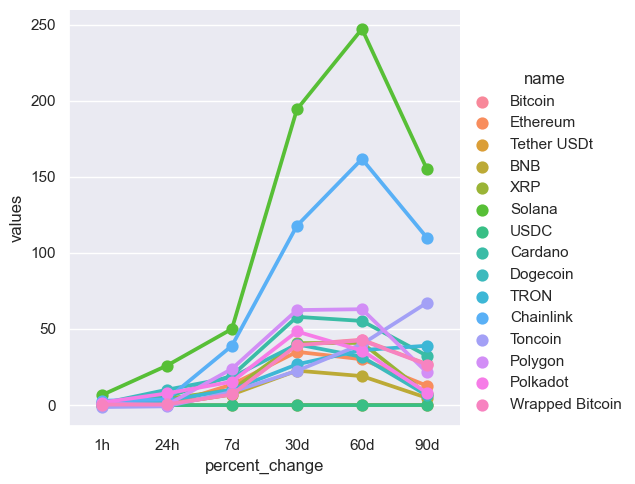

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [152]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10 = df10.reset_index(drop=True)
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,37256.08628,NaT
1,Bitcoin,37256.08628,2023-11-11 15:48:37.525916
2,Bitcoin,37266.39361,2023-11-11 15:49:44.741166
3,Bitcoin,37268.49048,2023-11-11 15:51:05.959419
4,Bitcoin,37256.08628,2023-11-11 15:55:11.658554


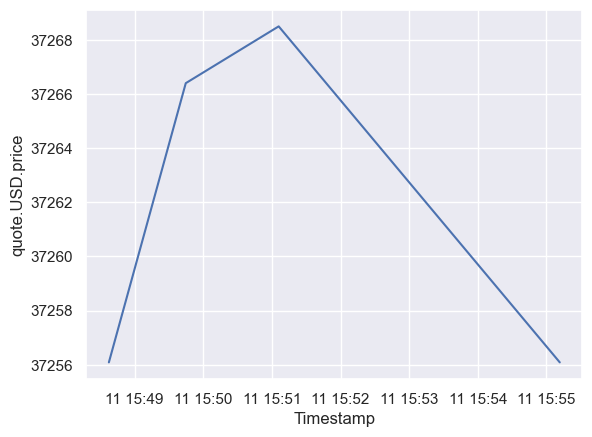

In [153]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)
plt.show()